In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
images_path = './images'
os.system('mkdir -p {}'.format(images_path))

0

## 1D model system

### Potential Energy Function

In [3]:
def pot_energy(x):
    if x < -1.25:
        return (4 * (np.pi**2)) * (x + 1.25)**2

    if x >= -1.25 and x <= -0.25:
        return 2 * (1 + np.sin(2 * np.pi * x))

    if x >= -0.25 and x <= 0.75:
        return 3 * (1 + np.sin(2 * np.pi * x))

    if x >= 0.75 and x <= 1.75:
        return 4 * (1 + np.sin(2 * np.pi * x))

    # if x >= 1.75:
    return 8 * (np.pi**2) * ((x - 1.75) ** 2)

In [4]:
oned_range = np.linspace(-2, 2.25, 1000)
pot_graph = np.array([pot_energy(i) for i in oned_range])

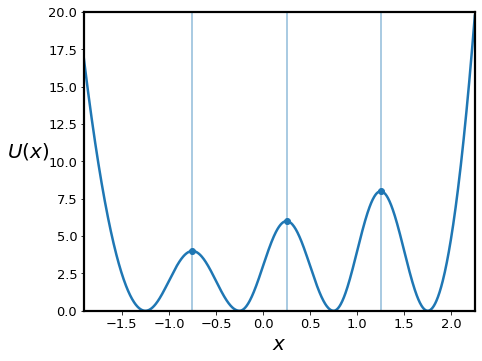

In [5]:
fig, ax = plt.subplots(figsize = (7, 5.5))
plt.plot(oned_range, pot_graph, lw = 2.5)
plt.xlim([-1.9, 2.25])
plt.ylim([0, 20])
maximas = np.array([-0.75, 0.25, 1.25])
U_maximas = np.array([pot_energy(i) for i in maximas])
plt.scatter(maximas, U_maximas)

for i in maximas:
    plt.axvline(x = i, alpha = 0.5)
_ = plt.xticks(fontsize = 13)
_ = plt.yticks(fontsize = 13)
plt.xlabel(r'$x$', fontsize = 20)
ylabel = plt.ylabel(r'$U(x)$', fontsize = 20, labelpad = 20)
ylabel.set_rotation(0)
_ = [i.set_linewidth(2.2) for i in ax.spines.values()]
plt.savefig(os.path.join(images_path, 'U.png'))

### Mean work

In [6]:
%%bash
mkdir -p /scratch/shaunak/1D
rsync -aPsq ada:/share1/shaunak/1D_Run/langevin_rens_* /scratch/shaunak/1D/

In [7]:
exchanges_oned = []
file_loc_oned = '/scratch/shaunak/1D'
for i in range(14):
    exchanges_oned.append(pd.read_csv(os.path.join(file_loc_oned, 'langevin_rens_{}'.format(i), 'exchanges.txt')))

In [8]:
w_mean_oned = [i['W'].mean() for i in exchanges_oned]
p_acc_oned = [i['Exchanged'].mean() for i in exchanges_oned]

In [9]:
taus_oned_dict = {"rens_0" : 0.0,  "rens_1" : 0.1,  "rens_2" : 0.2576,  "rens_3" : 0.3721,  "rens_4" : 0.79432823,  "rens_5" : 1.54169365,  "rens_6" : 2.0,  "rens_7" : 5.0,  "rens_8" : 14.0,  "rens_9" : 22.0,  "rens_10" : 35.0,  "rens_11" : 49.0,  "rens_12" : 69.0,  "rens_13" : 100.0}
taus_oned = np.array(list(taus_oned_dict.values()))
f_SW_oned = taus_oned / (6.0 + taus_oned)

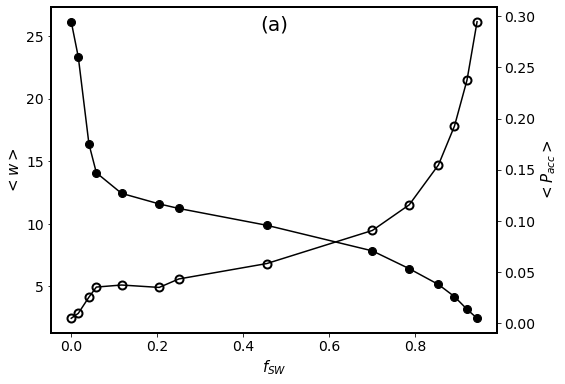

In [10]:
fig, ax1 = plt.subplots(figsize = (8, 6))
ax1.plot(f_SW_oned, w_mean_oned, marker = 'o', color = 'black', markersize = 8)


ax1.set_xlabel(r'$f_{SW}$', fontsize = 15)
ax1.set_ylabel(r'$<w>$', fontsize = 15)
ax1.tick_params(labelsize = 14)
plt.title('(a)', y = 0.91, fontsize = 20)

ax2 = ax1.twinx()
ax2.set_ylabel(r'$<P_{acc}>$', fontsize = 15)
ax2.plot(f_SW_oned, p_acc_oned, color = 'black', marker = 'o', markerfacecolor = 'none', 
         markeredgecolor = 'black', markersize = 8, markeredgewidth = 2)
ax2.tick_params(labelsize = 14)
_ = [i.set_linewidth(2) for i in ax2.spines.values()]
plt.savefig(os.path.join(images_path, '14_runs_w_p_acc.png'), bbox_inches = 'tight') 

### Probability distribution

In [11]:
from scipy.integrate import quad
beta_oned = 1 / (0.3)
f_oned = lambda x:np.exp(-beta_oned * pot_energy(x))
Z_oned = quad(f_oned, -np.inf, np.inf)[0]
expected_oned = np.array([f_oned(i) for i in oned_range]) / Z_oned

#### REMD

* Change the particle position to the one closest in the paper

In [12]:
pos_oned = np.loadtxt(os.path.join(file_loc_oned, 'langevin_rens_0/0'.format(i), 'p.txt'))

In [13]:
ind = (pos_oned[:, -1] == 0)
pos_values = pos_oned[ind, 1:-1]

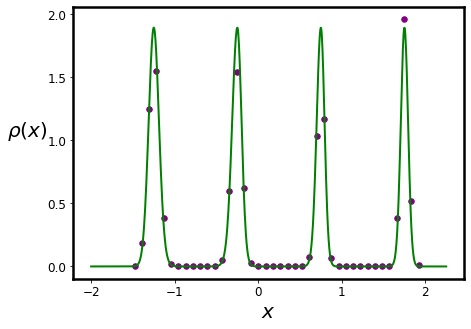

In [14]:
fig, ax = plt.subplots(figsize = (7, 5))
p_oned_rens, be_oned_rens = np.histogram(pos_values[:, 0], bins = 40, density = True)
coords_oned = 0.5 * (be_oned_rens[1:] + be_oned_rens[:-1])

plt.plot(oned_range, expected_oned, color = 'green', lw = 2)
plt.scatter(coords_oned, p_oned_rens, color = 'purple', s = 30)

_ = [i.set_linewidth(2.5) for i in ax.spines.values()]
_ = plt.xlabel(r'$x$', fontsize = 20)
_ = plt.ylabel(r'$\rho(x)$', fontsize = 20, labelpad = 20)
plt.yticks(np.arange(0, 2.5, 0.5), fontsize = 12)
plt.xticks(fontsize = 12)

_.set_rotation(0)

#### RENS

In [15]:
# all_positions = []
# for i in range(14):
#     all_positions.append(np.loadtxt(os.path.join(file_loc_oned, 'langevin_rens_{}/0'.format(i), 'p.txt')))
pos_oned = np.loadtxt(os.path.join(file_loc_oned, 'langevin_rens_0/0'.format(i), 'p.txt'))

In [16]:
ind = (pos_oned[:, -1] == 0)
pos_values = pos_oned[ind, 1:-1]

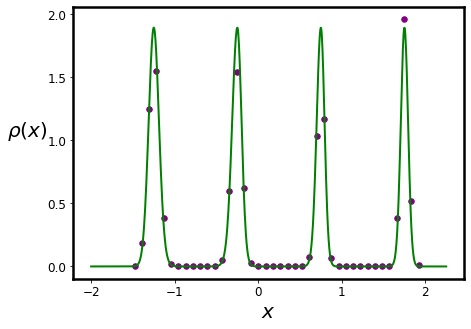

In [17]:
fig, ax = plt.subplots(figsize = (7, 5))
p_oned_rens, be_oned_rens = np.histogram(pos_values[:, 0], bins = 40, density = True)
coords_oned = 0.5 * (be_oned_rens[1:] + be_oned_rens[:-1])

plt.plot(oned_range, expected_oned, color = 'green', lw = 2)
plt.scatter(coords_oned, p_oned_rens, color = 'purple', s = 30)

_ = [i.set_linewidth(2.5) for i in ax.spines.values()]
_ = plt.xlabel(r'$x$', fontsize = 20)
_ = plt.ylabel(r'$\rho(x)$', fontsize = 20, labelpad = 20)
plt.yticks(np.arange(0, 2.5, 0.5), fontsize = 12)
plt.xticks(fontsize = 12)

_.set_rotation(0)

#### CFT

In [18]:
i = 2
p_f_oned, be_f_oned = np.histogram(exchanges_oned[i]['W_A'], bins = 40, density = True)
coords_f_oned = 0.5 * (be_f_oned[1:] + be_f_oned[:-1])

p_r_oned, be_r_oned = np.histogram(exchanges_oned[i]['W_B'], bins = 40, density = True)
coords_r_oned = 0.5 * (be_r_oned[1:] + be_r_oned[:-1])

In [19]:
beta_oned = 1 / 0.3
N_oned = 10
f_A = - N_oned * np.log(quad(f_oned, -np.inf, np.inf)[0]) - (N_oned / 2) * np.log(2 * np.pi / beta_oned)
beta_oned = 1 / 2
f_B = - N_oned * np.log(quad(f_oned, -np.inf, np.inf)[0]) - (N_oned / 2) * np.log(2 * np.pi / beta_oned)


delta_f_oned = f_B - f_A

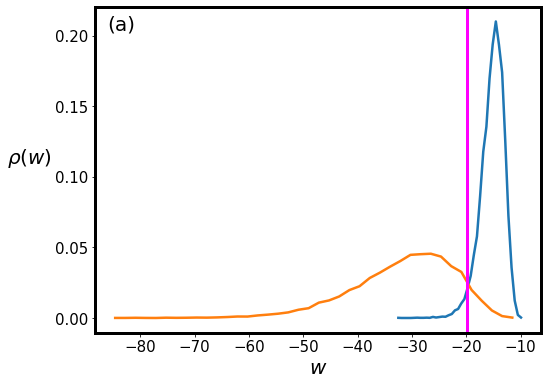

In [20]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.plot(coords_f_oned, p_f_oned, lw = 2.5, label = r'$\rho_A (w)$')

plt.plot(-coords_r_oned, p_r_oned, lw = 2.5, label = r'$\rho_B (-w)$')

plt.axvline(x = delta_f_oned, color = 'magenta', lw = 3, label = r'$\Delta f$')
# plt.legend(loc = 'best', fontsize = 20)

plt.xlabel(r'$w$', fontsize = 20)
y = plt.ylabel(r'$\rho (w)$', fontsize = 20, labelpad = 25)
y.set_rotation(0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('(a)', y = 0.91, x = 0.06, fontsize = 20)
_ = [i.set_linewidth(3) for i in ax.spines.values()]
plt.savefig(os.path.join(images_path, 'work.png'), bbox_inches = 'tight')

### Modified Muller brown potential

#### Functional Form

In [21]:
def U_MB(x, y):
    A = np.array([-200, -100, -170, 15])

    mean_x = np.array([1, 0, -0.5, -1])
    mean_y = np.array([0, 0.5, 1.5, 1])
    a = np.array([-1, -1, -6.5, 0.7])
    b = np.array([0, 0, 11, 0.6])
    c = np.array([-10, -10, -6.5, 0.7])

    exponent = a * (x - mean_x)**2 + b * (x - mean_x) * (y - mean_y)  + c * (y - mean_y)**2
    V_vector = A * np.exp(exponent)
    return V_vector.sum()

In [22]:
x_range = np.linspace(-2, 1.0, 200)
y_range = np.linspace(-0.5, 2.5, 100)

xs, ys = np.meshgrid(x_range, y_range)
xs_flatten = xs.flatten()
ys_flatten = ys.flatten()
u = np.zeros_like(xs_flatten)

for  i, point in enumerate(zip(xs_flatten, ys_flatten)):
    x = point[0]
    y = point[1]
    u[i] = U_MB(x, y)
u = u.reshape(xs.shape)

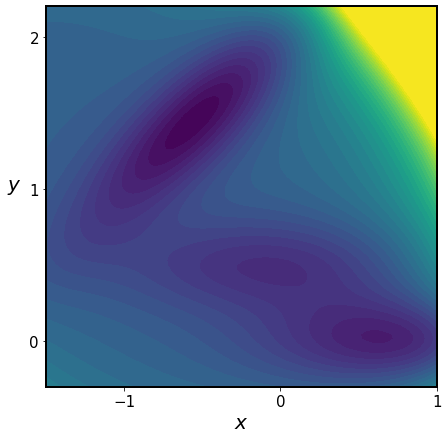

In [23]:
fig, ax = plt.subplots(figsize = (7, 7))

plt.contourf(xs, ys, u.clip(max = 400), levels = 40)
# plt.colorbar()
plt.xlabel(r'$x$', fontsize = 20)
_ = plt.ylabel(r'$y$', fontsize = 20, labelpad = 15)
_.set_rotation(0)
plt.yticks([0, 1, 2], fontsize = 15)
plt.xticks([-2, -1, 0, 1], fontsize = 15)
plt.xlim([-1.5, 1])
plt.ylim([-0.3, 2.2])
_ = [i.set_linewidth(2) for i in ax.spines.values()]

In [24]:
def U_Mod_MB(x, y):
    A = np.array([-200, -100, -170, 15])

    mean_x = np.array([1, 0, -0.5, -1])
    mean_y = np.array([0, 0.5, 1.5, 1])
    a = np.array([-1, -1, -6.5, 0.7])
    b = np.array([0, 0, 11, 0.6])
    c = np.array([-10, -10, -6.5, 0.7])

    exponent = a * (x - mean_x)**2 + b * (x - mean_x) * (y - mean_y)  + c * (y - mean_y)**2
    exponent[exponent > 700] = 700
    V_vector = A * np.exp(exponent)
    h = 200
    sigma = 0.8
    power_to_extra_term = ((x + 0.25)**2 + (y - 0.65)**2) / (2 * sigma**2)
    extra_term = h * np.exp(-power_to_extra_term)
    return V_vector.sum() + extra_term

In [25]:
u_mod_mb = np.zeros_like(xs_flatten)
for  i, point in enumerate(zip(xs_flatten, ys_flatten)):
    x = point[0]
    y = point[1]
    u_mod_mb[i] = U_Mod_MB(x, y)
u_mod_mb = u_mod_mb.reshape(xs.shape)

* FIND THE MINIMA USING MINIMIZATION

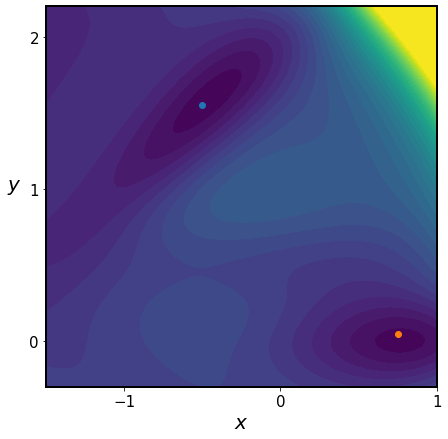

In [26]:
fig, ax = plt.subplots(figsize = (7, 7))
minima1 = np.array([-0.5, 1.55])
minima2 = np.array([0.75, 0.05])
plt.contourf(xs, ys, u_mod_mb.clip(max = 800), levels = 40)
# plt.colorbar()
plt.xlabel(r'$x$', fontsize = 20)
_ = plt.ylabel(r'$y$', fontsize = 20, labelpad = 15)
_.set_rotation(0)
plt.yticks([0, 1, 2], fontsize = 15)
plt.xticks([-2, -1, 0, 1], fontsize = 15)
plt.xlim([-1.5, 1])
plt.ylim([-0.3, 2.2])
_ = [i.set_linewidth(2) for i in ax.spines.values()]
plt.scatter(minima1[0], minima1[1])
plt.scatter(minima2[0], minima2[1])

#### Mean work

In [27]:
%%bash
mkdir -p /scratch/shaunak/MB
rsync -aPsq ada:/share1/shaunak/2D_Run/mullermod_rens_* /scratch/shaunak/MB/

In [28]:
exchanges_mb = []
file_loc_mb = '/scratch/shaunak/MB'
for i in range(14):
    exchanges_mb.append(pd.read_csv(os.path.join(file_loc_mb, 'mullermod_rens_{}'.format(i), 'exchanges.txt')))

In [29]:
w_mean_mb = [i['W'].mean() for i in exchanges_mb]
p_acc_mb = [i['Exchanged'].mean() for i in exchanges_mb]

In [30]:
tau_mb_dict = {"rens_0" : 0.0,  "rens_1" : 0.1,  "rens_2" : 0.2576,  "rens_3" : 0.3721,  "rens_4" : 0.79432823,  "rens_5" : 1.54169365,  "rens_6" : 2.0,  "rens_7" : 5.0,  "rens_8" : 14.0,  "rens_9" : 22.0,  "rens_10" : 35.0,  "rens_11" : 49.0,  "rens_12" : 69.0,  "rens_13" : 100.0}
taus_mb = np.array(list(tau_mb_dict.values()))
f_SW_mb = taus_mb / (6.0 + taus_mb)

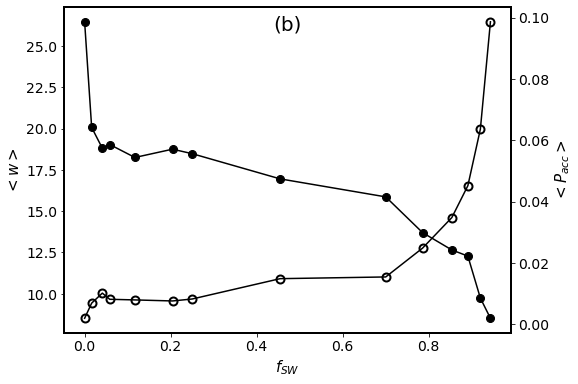

In [31]:
fig, ax1 = plt.subplots(figsize = (8, 6))
ax1.plot(f_SW_mb, w_mean_mb, marker = 'o', color = 'black', markersize = 8)


ax1.set_xlabel(r'$f_{SW}$', fontsize = 15)
ax1.set_ylabel(r'$<w>$', fontsize = 15)
ax1.tick_params(labelsize = 14)
plt.title('(b)', y = 0.91, fontsize = 20)

ax2 = ax1.twinx()
ax2.set_ylabel(r'$<P_{acc}>$', fontsize = 15)
ax2.plot(f_SW_mb, p_acc_mb, color = 'black', marker = 'o', markerfacecolor = 'none', 
         markeredgecolor = 'black', markersize = 8, markeredgewidth = 2)
ax2.tick_params(labelsize = 14)
_ = [i.set_linewidth(2) for i in ax2.spines.values()]
plt.savefig(os.path.join(images_path, '2D_Trend.png'), bbox_inches = 'tight') 

#### Probability distribution

In [32]:
beta_mb = 1 / 7
from scipy.integrate import dblquad
f_mb = lambda x, y : np.exp(-beta_mb * U_Mod_MB(x, y))
Z_mb = dblquad(f_mb, -np.inf, np.inf, lambda _ :-np.inf, lambda _ : np.inf)[0]

exp_mb = np.exp(-beta_mb * u_mod_mb) / Z_mb

In [33]:
replica_no_mb = 1

pos_mb = np.loadtxt(os.path.join(file_loc_mb, 'mullermod_rens_{}/0'.format(replica_no_mb) , 'p.txt'))

In [34]:
ind_mb = (pos_mb == 0)
pos_values_mb = pos_mb[ind, 1:-1]

In [35]:
particle_no_mb = 1
xedges_mb = np.linspace(-1, 1, 40)
yedges_mb = np.linspace(-0.5, 2.1, 40)
H_mb, xedges, yedges = np.histogram2d(pos_values_mb[:, 2 * particle_no_mb], pos_values_mb[:, 2 * particle_no_mb + 1], bins = (xedges_mb, yedges_mb), density = True)
# H, xedges, yedges = np.histogram2d(pos[:, 1], pos[:, 2], density = True)
# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.
H_mb = H_mb.T

x_mb, y_mb = np.meshgrid((xedges_mb[1:] + xedges_mb[:-1]) / 2, (yedges_mb[1:] + yedges_mb[:-1]) / 2)

* ADD THE CORRECT POSITION PLOT FOR REMD AND RENS FOR MB 2D

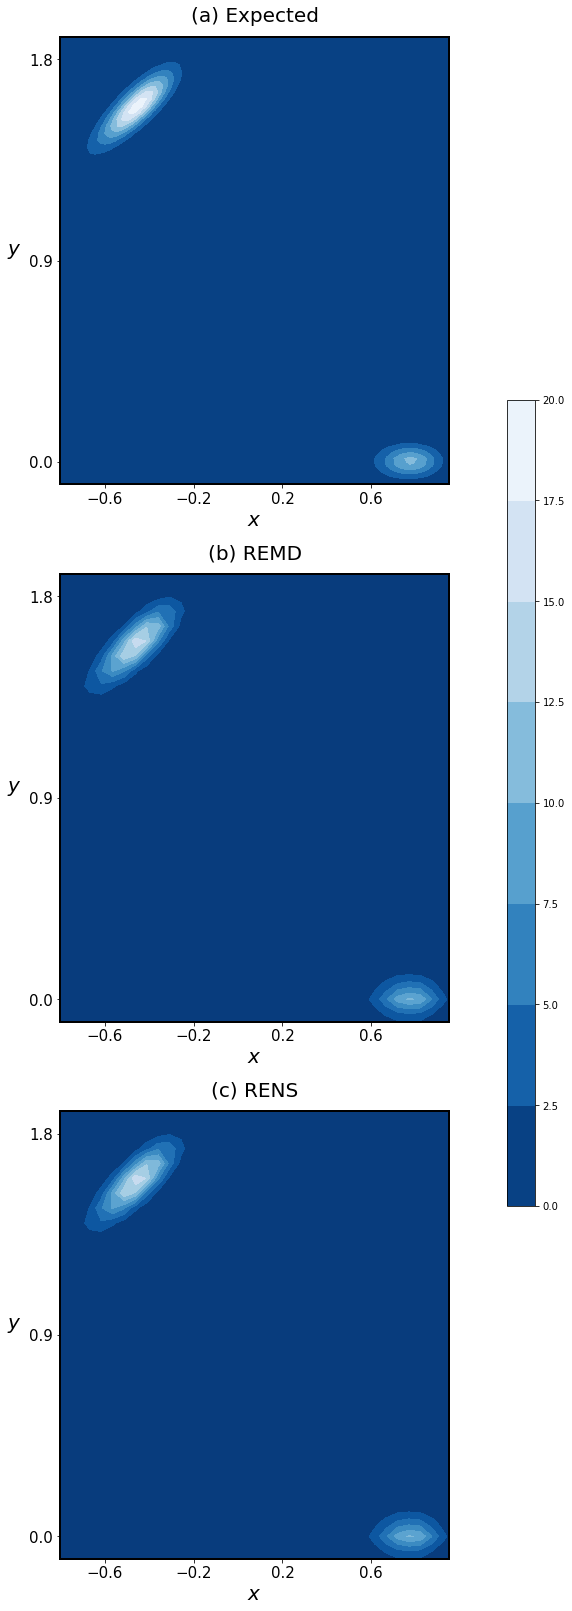

In [36]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (8, 28))

ax = axes[0]
im = ax.contourf(xs, ys, exp_mb, cmap = "Blues_r", vmin = 0, vmax = 20)
# plt.colorbar()
ax.set_xlabel(r'$x$', fontsize = 20)
_ = ax.set_ylabel(r'$y$', fontsize = 20, labelpad = 15)
_.set_rotation(0)
ax.set_xticks([-0.6, -0.2, 0.2, 0.6])
ax.tick_params(labelsize = 15, axis = 'y')
ax.set_yticks([0, 0.9, 1.8])
ax.tick_params(labelsize = 15, axis = 'x')
# plt.xlim([-1.5, 1])
ax.set_xlim([-0.8, 0.95])
ax.set_ylim([-0.1, 1.9])
ax.set_title('(a) Expected', fontsize = 20, y = 1.02)
_ = [i.set_linewidth(2) for i in ax.spines.values()]
# plt.colorbar()

# REMD
ax = axes[1]
ax.contourf(x_mb, y_mb, H_mb, cmap = "Blues_r", vmin = 0, vmax = 20)
ax.set_xlabel(r'$x$', fontsize = 20)
_ = ax.set_ylabel(r'$y$', fontsize = 20, labelpad = 15)
_.set_rotation(0)
ax.set_xticks([-0.6, -0.2, 0.2, 0.6])
ax.tick_params(labelsize = 15, axis = 'y')
ax.set_yticks([0, 0.9, 1.8])
ax.tick_params(labelsize = 15, axis = 'x')
# plt.xlim([-1.5, 1])
ax.set_xlim([-0.8, 0.95])
ax.set_ylim([-0.1, 1.9])
ax.set_title('(b) REMD', fontsize = 20, y = 1.02)
_ = [i.set_linewidth(2) for i in ax.spines.values()]

# RENS
ax = axes[2]
ax.contourf(x_mb, y_mb, H_mb, cmap = "Blues_r", vmin = 0, vmax = 20)
ax.set_xlabel(r'$x$', fontsize = 20)
_ = ax.set_ylabel(r'$y$', fontsize = 20, labelpad = 15)
_.set_rotation(0)
ax.set_xticks([-0.6, -0.2, 0.2, 0.6])
ax.tick_params(labelsize = 15, axis = 'y')
ax.set_yticks([0, 0.9, 1.8])
ax.tick_params(labelsize = 15, axis = 'x')
# plt.xlim([-1.5, 1])
ax.set_xlim([-0.8, 0.95])
ax.set_ylim([-0.1, 1.9])
ax.set_title('(c) RENS', fontsize = 20, y = 1.02)
_ = [i.set_linewidth(2) for i in ax.spines.values()]

fig.subplots_adjust(right= 0.8)
cbar_ax = fig.add_axes([0.9, 0.3, 0.05, 0.4])
fig.colorbar(im, cax=cbar_ax)

#### CFT

In [37]:
i_mb = 6
p_f_mb, be_f_mb = np.histogram(exchanges_mb[i_mb]['W_A'], bins = 40, density = True)
coords_f_mb = 0.5 * (be_f_mb[1:] + be_f_mb[:-1])

p_r_mb, be_r_mb = np.histogram(exchanges_mb[i_mb]['W_B'], bins = 40, density = True)
coords_r_mb = 0.5 * (be_r_mb[1:] + be_r_mb[:-1])

In [38]:
beta_mb = 1 / 7
N_mb = 10
f_mb = lambda x, y: np.exp(-beta_mb * U_Mod_MB(x, y))
f_A = - N_mb * np.log(dblquad(f_mb, -np.inf, np.inf, lambda _ : -np.inf, lambda _ : np.inf)[0]) - N_mb * np.log(2 * np.pi / beta_mb)
beta_mb = 1 / 20
f_B = - N_mb * np.log(dblquad(f_mb, -np.inf, np.inf, lambda _ : -np.inf, lambda _ : np.inf)[0]) - N_mb * np.log(2 * np.pi / beta_mb)
beta_mb = 1 / 7

delta_f_mb = f_B - f_A

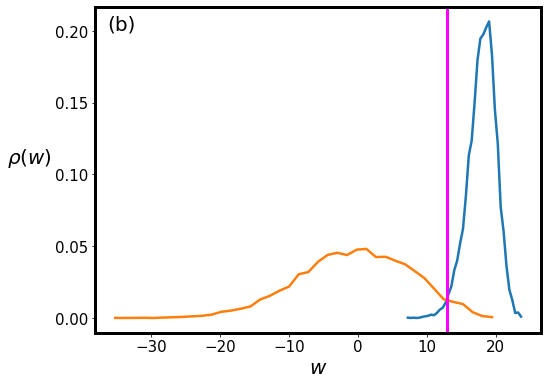

In [39]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.plot(coords_f_mb, p_f_mb, lw = 2.5, label = r'$\rho_A (w)$')

plt.plot(-coords_r_mb, p_r_mb, lw = 2.5, label = r'$\rho_B (-w)$')

plt.axvline(x = delta_f_mb, color = 'magenta', lw = 3, label = r'$\Delta f$')
# plt.legend(loc = 'best', fontsize = 20)

plt.xlabel(r'$w$', fontsize = 20)
y = plt.ylabel(r'$\rho (w)$', fontsize = 20, labelpad = 25)
y.set_rotation(0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('(b)', y = 0.91, x = 0.06, fontsize = 20)
_ = [i.set_linewidth(3) for i in ax.spines.values()]
plt.savefig(os.path.join(images_path, 'work_2D.png'), bbox_inches = 'tight')

### Work simulations between $T_A = 7$ and $T_B = 12$

### LEPS potential

#### Functional form

In [40]:
from LEPS import LEPS_II_Mod as L_II_Mod
from LEPS import LEPS_II as L_II
from LEPS import LEPS_I as L_I

V_LEPS_II_Mod = L_II_Mod().V
V_LEPS_II = L_II().V
V_LEPS_I = L_I().V

In [41]:
rAB_II, x = np.meshgrid(np.arange(0.2, 4.1, 0.05), np.arange(-3.4, 3.4, 0.05))
l = rAB_II.flatten().shape[0]
LEPS_I = np.zeros(l)
LEPS_II = np.zeros(l)

LEPS_II_Mod = np.zeros(l)
for i in np.arange(l):
    LEPS_I[i] = V_LEPS_I(rAB_II.flatten()[i], x.flatten()[i])
    LEPS_II[i] = V_LEPS_II(rAB_II.flatten()[i], x.flatten()[i])
    LEPS_II_Mod[i] = V_LEPS_II_Mod(rAB_II.flatten()[i], x.flatten()[i])
LEPS_I = LEPS_I.reshape(rAB_II.shape)    
LEPS_II = LEPS_II.reshape(rAB_II.shape)
LEPS_II_Mod = LEPS_II_Mod.reshape(rAB_II.shape)

In [42]:
def plot_graph(mode = 2):
    fig = plt.figure(figsize = (8, 8))

    ax = fig.add_subplot(1, 1, 1)
    pes = LEPS_II_Mod
    title = 'LEPS_II_Mod'
    if mode == 0:
        pes = LEPS_I
        title = 'LEPS_I'
    if mode == 1:
        pes = LEPS_II
        title = 'LEPS_II'
    C = plt.contourf(rAB_II, x, pes, cmap="Blues_r", levels = np.linspace(-4.6, 10, 30))
    plt.colorbar()
    ax.contour(rAB_II, x, pes, colors='white', levels = np.linspace(-4.6, 10, 20), alpha = 0.3, linewidths = 2)
    ax.set_xlabel('$r_\mathrm{AB}$', fontsize = 16)
    ax.set_title(title, fontsize = 20)
    if mode == 0:
        _ = ax.set_ylim(0.5, 3.2)
        ax.set_ylabel('$r_\mathrm{BC}$', fontsize = 16)
    else:
        ax.set_ylabel('$x$', fontsize = 16)
        
    _ = ax.set_xlim(0.3, 3.4)

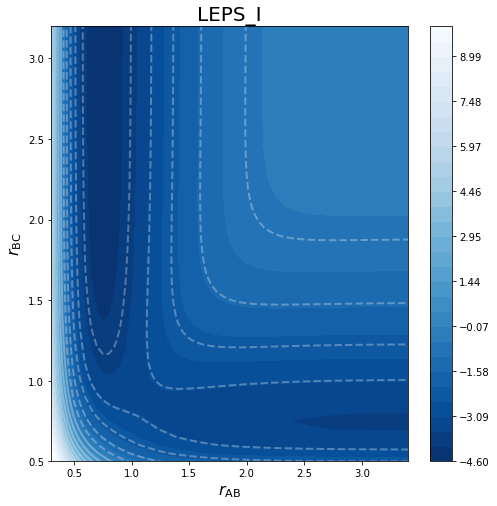

In [43]:
plot_graph(mode = 0)
plt.savefig(os.path.join(images_path, 'LEPS_I.png'), bbox_inches = 'tight')

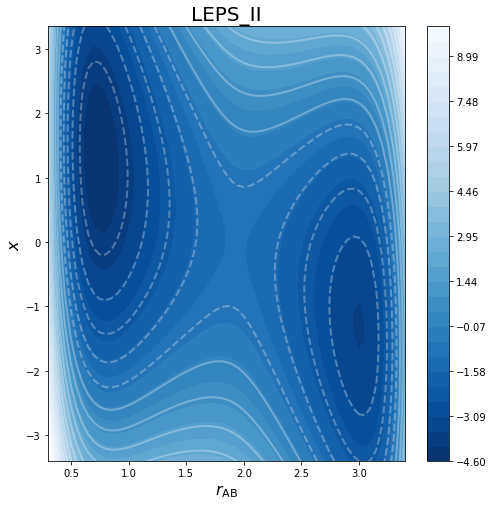

In [44]:
plot_graph(mode = 1)
plt.savefig(os.path.join(images_path, 'LEPS_II.png'), bbox_inches = 'tight')

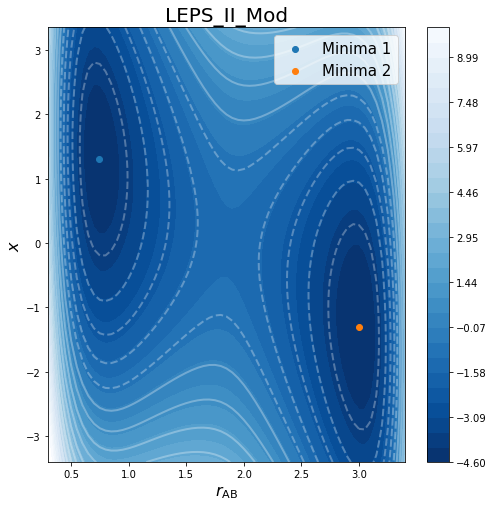

In [45]:
plot_graph(mode = 2)
plt.scatter(0.742, 1.303, label = 'Minima 1')
plt.scatter(3.001, -1.303, label = 'Minima 2')
plt.legend(loc = 'best', fontsize = 15)
plt.savefig(os.path.join(images_path, 'LEPS_II_Mod.png'), bbox_inches = 'tight')

#### Mean work

In [46]:
%%bash
mkdir -p /scratch/shaunak/leps_2_mod
rsync -aPsq ada:/share1/shaunak/leps_2_mod/rens_* /scratch/shaunak/leps_2_mod/

In [47]:
exchanges_leps = []
file_loc = '/scratch/shaunak/leps_2_mod'

for i in range(14):
    exchanges_leps.append(pd.read_csv(os.path.join(file_loc, 'rens_{}/exchanges.txt'.format(i))))

In [48]:
w_mean_leps = [i['W'].mean() for i in exchanges_leps]
p_acc_leps = [i['Exchanged'].mean() for i in exchanges_leps]

tau_values_leps = {"rens_0" : 0.0,  "rens_1" : 0.1,  "rens_2" : 0.2576,  "rens_3" : 0.3721,  "rens_4" : 0.79432823,  "rens_5" : 1.54169365,  "rens_6" : 2.0,  "rens_7" : 5.0,  "rens_8" : 14.0,  "rens_9" : 22.0,  "rens_10" : 35.0,  "rens_11" : 49.0,  "rens_12" : 69.0,  "rens_13" : 100.0}
taus_leps = np.array(list(tau_values_leps.values()))

f_SW_leps = taus_leps / (6.0 + taus_leps)

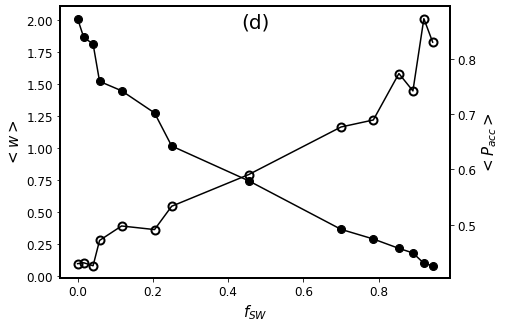

In [49]:
fig, ax1 = plt.subplots(figsize = (7, 5))
ax1.plot(f_SW_leps, w_mean_leps, marker = 'o', color = 'black', markersize = 8)


ax1.set_xlabel(r'$f_{SW}$', fontsize = 15)
ax1.set_ylabel(r'$<w>$', fontsize = 15)
ax1.tick_params(labelsize = 12)
plt.title('(d)', y = 0.9, fontsize = 20)

ax2 = ax1.twinx()
ax2.set_ylabel(r'$<P_{acc}>$', fontsize = 15)
ax2.plot(f_SW_leps, p_acc_leps, color = 'black', marker = 'o', markerfacecolor = 'none', 
         markeredgecolor = 'black', markersize = 8, markeredgewidth = 2)
ax2.tick_params(labelsize = 12)
_ = [i.set_linewidth(2) for i in ax2.spines.values()]
plt.savefig(os.path.join(images_path, 'w_mean_leps.png'), bbox_inches = 'tight') 

#### Probability distribution

In [50]:
file_loc_leps = '/scratch/shaunak/leps_2_mod'

pos_leps = np.loadtxt(os.path.join(file_loc_leps, 'rens_3/0/p.txt'))

ind = (pos_leps[:, -1]) == 0

p_leps = pos_leps[ind, 1:-1]

In [53]:
from LEPS import Z_LEPS, Free_energy
T_LEPS = 0.3
Z_leps = Z_LEPS(T_LEPS)
kB = 1
beta_leps = 1 / (kB * T_LEPS)
exp_leps = np.exp(-beta_leps * LEPS_II_Mod) / Z_leps

In [54]:
xedges = np.linspace(rAB_II[0, 0], rAB_II[0, -1], 20)
yedges = np.linspace(x[0, 0], x[-1, 0], 20)
H_LEPS, xedges, yedges = np.histogram2d(p_leps[:, 0], p_leps[:, 1], bins = (xedges, yedges), density = True)
# H, xedges, yedges = np.histogram2d(pos[:, 1], pos[:, 2], density = True)
# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.
H_LEPS = H_LEPS.T

x_leps, y_leps = np.meshgrid((xedges[1:] + xedges[:-1]) / 2, (yedges[1:] + yedges[:-1]) / 2)

* PUT REMD AND RENS PROB DISTS HERE

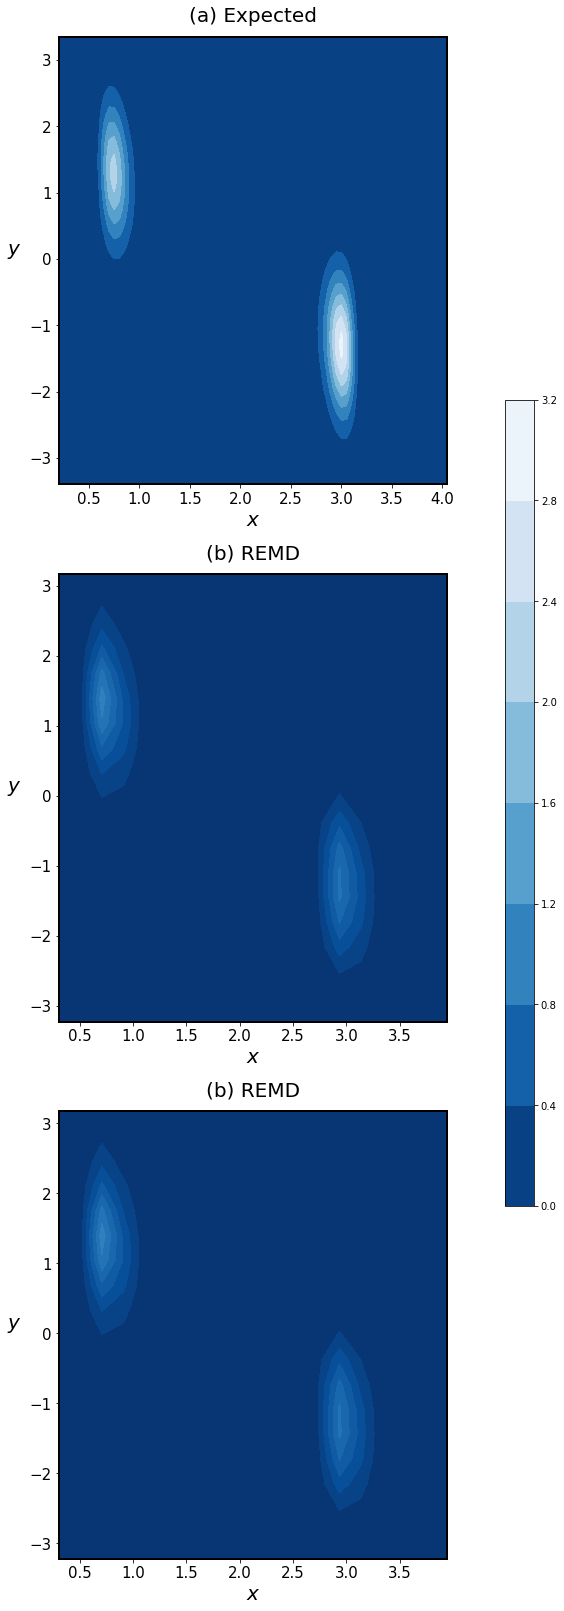

In [55]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (8, 28))

ax = axes[0]
im = ax.contourf(rAB_II, x, exp_leps, cmap = "Blues_r", vmin = 0, vmax = 3.2)
ax.set_xlabel(r'$x$', fontsize = 20)
_ = ax.set_ylabel(r'$y$', fontsize = 20, labelpad = 15)
_.set_rotation(0)
ax.tick_params(labelsize = 15, axis = 'y')
ax.tick_params(labelsize = 15, axis = 'x')

ax.set_title('(a) Expected', fontsize = 20, y = 1.02)
_ = [i.set_linewidth(2) for i in ax.spines.values()]

# REMD
ax = axes[1]
ax.contourf(x_leps, y_leps, H_LEPS, cmap = "Blues_r", vmin = 0, vmax = 3.2)
ax.set_xlabel(r'$x$', fontsize = 20)
_ = ax.set_ylabel(r'$y$', fontsize = 20, labelpad = 15)
_.set_rotation(0)
ax.tick_params(labelsize = 15, axis = 'y')
ax.tick_params(labelsize = 15, axis = 'x')

ax.set_title('(b) REMD', fontsize = 20, y = 1.02)
_ = [i.set_linewidth(2) for i in ax.spines.values()]

# RENS
ax = axes[2]
ax.contourf(x_leps, y_leps, H_LEPS, cmap = "Blues_r", vmin = 0, vmax = 3.2)
ax.set_xlabel(r'$x$', fontsize = 20)
_ = ax.set_ylabel(r'$y$', fontsize = 20, labelpad = 15)
_.set_rotation(0)
ax.tick_params(labelsize = 15, axis = 'y')
ax.tick_params(labelsize = 15, axis = 'x')

ax.set_title('(b) REMD', fontsize = 20, y = 1.02)
_ = [i.set_linewidth(2) for i in ax.spines.values()]

fig.subplots_adjust(right= 0.8)
cbar_ax = fig.add_axes([0.9, 0.3, 0.05, 0.4])
fig.colorbar(im, cax=cbar_ax)

#### CFT

In [56]:
exchanges_leps = pd.read_csv(os.path.join(file_loc_leps, 'rens_1/exchanges.txt'))

In [57]:
f_0 = Free_energy(1, 0.3)
f_1 = Free_energy(1, 1)

delta_f_leps = f_1 - f_0

In [58]:
p_f_leps, be_f_leps = np.histogram(exchanges_leps['W_A'], bins = 50, density = True)
coords_f_leps = (be_f_leps[1:] + be_f_leps[:-1])/2

p_r_leps, be_r_leps = np.histogram(exchanges_leps['W_B'], bins = 50, density = True)
coords_r_leps = (be_r_leps[1:] + be_r_leps[:-1])/2



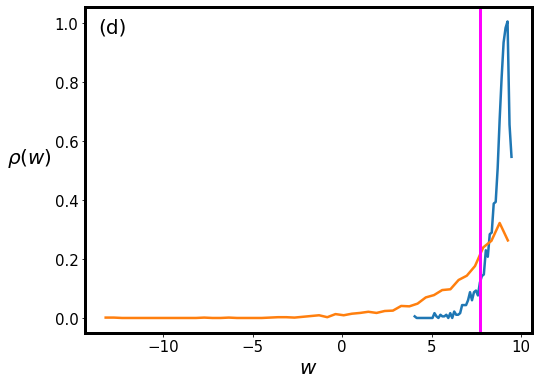

In [59]:
fig, ax = plt.subplots(figsize = (8, 6))

plt.plot(coords_f_leps, p_f_leps, lw = 2.5, label = r'$\rho_A (w)$')

plt.plot(-coords_r_leps, p_r_leps, lw = 2.5, label = r'$\rho_B (-w)$')

plt.axvline(x = delta_f_leps, color = 'magenta', lw = 3, label = r'$\Delta f$')
# plt.legend(loc = 'best', fontsize = 20)

plt.xlabel(r'$w$', fontsize = 20)
y = plt.ylabel(r'$\rho (w)$', fontsize = 20, labelpad = 25)
y.set_rotation(0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('(d)', y = 0.9, x = 0.06, fontsize = 20)
_ = [i.set_linewidth(3) for i in ax.spines.values()]
plt.savefig(os.path.join(images_path, 'work_leps.png'), bbox_inches = 'tight')

### Lennard-Jones Argon

#### Functional form

In [60]:
def U(r):
    sigma = 3.4
    epsilon = 8.8
    
    l = (sigma / r)**6
    return 4 * epsilon * (l**2 - l)

In [61]:
l = np.linspace(3.25, 8, 1000)
LJ_U = U(l)

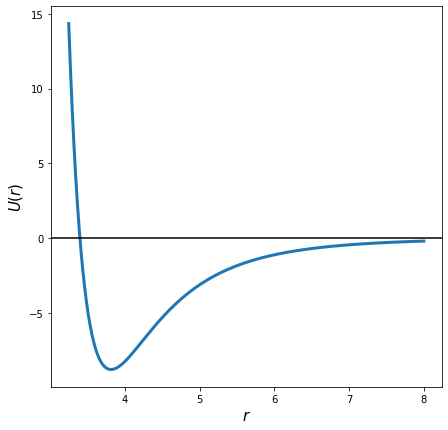

In [62]:
fig = plt.figure(figsize = (7, 7))
plt.plot(l, LJ_U, lw = 3)
plt.axhline(y = 0, color = 'black')
plt.xlabel(r'$r$', fontsize = 15)
plt.ylabel(r'$U(r)$', fontsize = 15)
plt.savefig(os.path.join(images_path, 'LJ.png'))

#### Mean work

In [63]:
%%bash
mkdir -p /scratch/shaunak/LJ 
rsync -aPsq ada:/share1/shaunak/LJ_Run_80_105/* /scratch/shaunak/LJ/

In [64]:
exchanges_lj = []
file_loc = '/scratch/shaunak/LJ'

for i in range(10):
    exchanges_lj.append(pd.read_csv(os.path.join(file_loc, 'LJ_rens_{}/exchanges.txt'.format(i))))

In [65]:
w_mean = [i['W'].mean() for i in exchanges_lj]
p_acc = [i['Exchanged'].mean() for i in exchanges_lj]

tau_values_lj = {"rens_0" : 0.0,  "rens_1" : 1.0,  "rens_2" : 2.0,  "rens_3" : 5.0,  "rens_4" : 10.0,  "rens_5" : 20.0,  "rens_6" : 40.0,  "rens_7" : 60.0,  "rens_8" : 80.0,  "rens_9" : 100.0}

taus_lj = np.array(list(tau_values_lj.values()))

f_SW_lj = taus_lj / (6.0 + taus_lj)

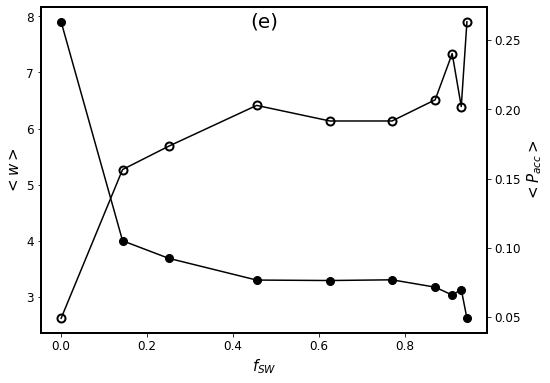

In [66]:
fig, ax1 = plt.subplots(figsize = (8, 6))
ax1.plot(f_SW_lj, w_mean, marker = 'o', color = 'black', markersize = 8)

ax1.set_xlabel(r'$f_{SW}$', fontsize = 15)
ax1.set_ylabel(r'$<w>$', fontsize = 15)
ax1.tick_params(labelsize = 12)
plt.title('(e)', y = 0.92, fontsize = 20)


ax2 = ax1.twinx()
ax2.set_ylabel(r'$<P_{acc}>$', fontsize = 15)
ax2.plot(f_SW_lj, p_acc, color = 'black', marker = 'o', markerfacecolor = 'none', 
         markeredgecolor = 'black', markersize = 8, markeredgewidth = 2)
ax2.tick_params(labelsize = 12)
_ = [i.set_linewidth(2) for i in ax2.spines.values()]
plt.savefig(os.path.join(images_path, 'w_mean_lj.png'), bbox_inches = 'tight')

#### Probability distribution

* Can't calculate

#### CFT

In [67]:
exchanges_LJ = pd.read_csv(os.path.join(file_loc, 'LJ_rens_2/exchanges.txt'))

p_f_lj, be_f_lj = np.histogram(exchanges_LJ['W_A'], bins = 50, density = True)
coords_f_lj = (be_f_lj[1:] + be_f_lj[:-1])/2

p_r_lj, be_r_lj = np.histogram(exchanges_LJ['W_B'], bins = 50, density = True)
coords_r_lj = (be_r_lj[1:] + be_r_lj[:-1])/2

free_lj = 170.7

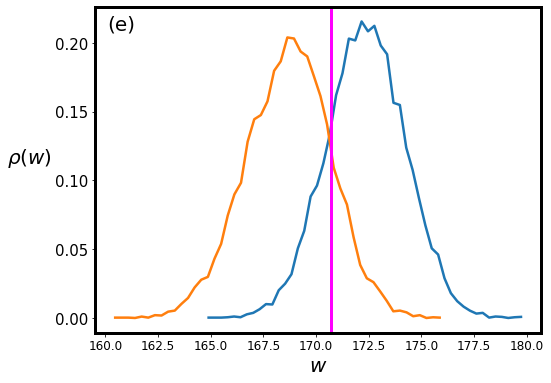

In [68]:
fig, ax = plt.subplots(figsize = (8, 6))

plt.plot(coords_f_lj, p_f_lj, lw = 2.5, label = r'$\rho_A (w)$')

plt.plot(-coords_r_lj, p_r_lj, lw = 2.5, label = r'$\rho_B (-w)$')

plt.axvline(x = free_lj, color = 'magenta', lw = 3, label = r'$\Delta f$')
# plt.legend(loc = 'best', fontsize = 20)

plt.xlabel(r'$w$', fontsize = 20)
y = plt.ylabel(r'$\rho (w)$', fontsize = 20, labelpad = 25)
y.set_rotation(0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 12)
plt.title('(e)', y = 0.91, x = 0.06, fontsize = 20)
_ = [i.set_linewidth(3) for i in ax.spines.values()]
plt.savefig(os.path.join(images_path, 'work_lj.png'), bbox_inches = 'tight')